In [15]:
import os, cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

label_dir = '/mnt/hdd1/c-MET_datasets/SLIDE_DATA/DL-based_tumor_seg_dataset/2205_1차anno/patch'
slide_list = sorted([i for i in os.listdir(label_dir) if os.path.isdir(os.path.join(label_dir, i))])

tumorable, non_tumorable = [], []
patch_mag = 200
patch_size = 256
for i, slide in enumerate(slide_list):

    data_dir = os.path.join(label_dir, slide, f'{patch_mag}x_{patch_size}')
    labels = sorted([l for l in os.listdir(data_dir) if 'label' in l and 'png' in l])
    inputs = sorted([i for i in os.listdir(data_dir) if 'input' in i and 'jpg' in i])

    for j in range(len(labels)):
        if inputs[j].split('_input.jpg')[0] != labels[j].split('_label.png')[0]:
            print(f'check the pairness btw input {inputs[j]} and label {labels[j]}')
            break

        label_mask = cv2.imread(os.path.join(data_dir, labels[j]), cv2.IMREAD_GRAYSCALE)

        if np.sum(label_mask) > (patch_size**2)*255*0.1:
            tumorable.append((inputs[j], labels[j]))
        else:
            non_tumorable.append((inputs[j], labels[j]))


In [16]:
len(tumorable), len(non_tumorable)

(39569, 61242)

In [19]:
tumorable[0], non_tumorable[0]

(('S-LC0027-MET_11776_17408_input.jpg', 'S-LC0027-MET_11776_17408_label.png'),
 ('S-LC0027-MET_10752_10240_input.jpg', 'S-LC0027-MET_10752_10240_label.png'))

In [18]:
np.array(tumorable).shape

(39569, 2)

In [25]:
from sklearn.model_selection import KFold
save_dir = '/mnt/hdd1/c-MET_datasets/SLIDE_DATA/DL-based_tumor_seg_dataset/2205_1차anno'

kf = KFold(n_splits = 5, shuffle = True, random_state = 44)

for i, ((tr_idx, ts_idx), (n_tr_idx, n_ts_idx)) in enumerate(zip(kf.split(tumorable), kf.split(non_tumorable))):
    print(i, np.array(tumorable)[ts_idx].shape, np.array(non_tumorable)[n_ts_idx].shape)
    np.save(os.path.join(save_dir, f'{i+1}-fold_tumorable_data.npy'), np.array(tumorable)[ts_idx])
    np.save(os.path.join(save_dir, f'{i+1}-fold_non_tumorable_data.npy'), np.array(non_tumorable)[n_ts_idx])

0 (7914, 2) (12249, 2)
1 (7914, 2) (12249, 2)
2 (7914, 2) (12248, 2)
3 (7914, 2) (12248, 2)
4 (7913, 2) (12248, 2)


In [10]:
import os, cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

label_dir = '/mnt/hdd1/c-MET_datasets/SLIDE_DATA/DL-based_tumor_seg_dataset/2205_1차anno/patch'
slide_list = sorted([i for i in os.listdir(label_dir) if os.path.isdir(os.path.join(label_dir, i))])

props = {256: [], 512: [], 1024: []}
patch_mag = 200
patch_size = 256
for patch_size in [256, 512, 1024]:
    for i, slide in enumerate(slide_list):

        data_dir = os.path.join(label_dir, slide, f'{patch_mag}x_{patch_size}')
        labels = sorted([l for l in os.listdir(data_dir) if 'label' in l and 'png' in l])
        inputs = sorted([i for i in os.listdir(data_dir) if 'input' in i and 'jpg' in i])

        for j in range(len(labels)):
            if inputs[j].split('_input.jpg')[0] != labels[j].split('_label.png')[0]:
                print(f'check the pairness btw input {inputs[j]} and label {labels[j]}')
                break

            label_mask = cv2.imread(os.path.join(data_dir, labels[j]), cv2.IMREAD_GRAYSCALE)

            prop = round(np.sum(label_mask)/((patch_size**2)*255), 3)
            
            props[patch_size].append(prop)

In [28]:
def count_w_10_cutoffs(list):

    n_1, n_2, n_3, n_4, n_5, n_6, n_7, n_8, n_9, n_10 = [], [], [], [], [], [], [], [], [], []

    for p in list:
        if p <= 0.1: n_1.append(p)
        elif p <= 0.2: n_2.append(p)
        elif p <= 0.3: n_3.append(p)
        elif p <= 0.4: n_4.append(p)
        elif p <= 0.5: n_5.append(p)
        elif p <= 0.6: n_6.append(p)
        elif p <= 0.7: n_7.append(p)
        elif p <= 0.8: n_8.append(p)
        elif p <= 0.9: n_9.append(p)
        elif p <= 1: n_10.append(p)

    print(len(n_1), len(n_2), len(n_3), len(n_4), len(n_5), len(n_6), len(n_7), len(n_8), len(n_9), len(n_10))

count_w_10_cutoffs(props[256])
count_w_10_cutoffs(props[512])
count_w_10_cutoffs(props[1024])


61252 2005 1777 1644 1573 1561 1634 1750 1986 25629
15918 786 658 632 624 624 603 646 740 5509
4113 299 241 242 207 185 208 214 257 1134


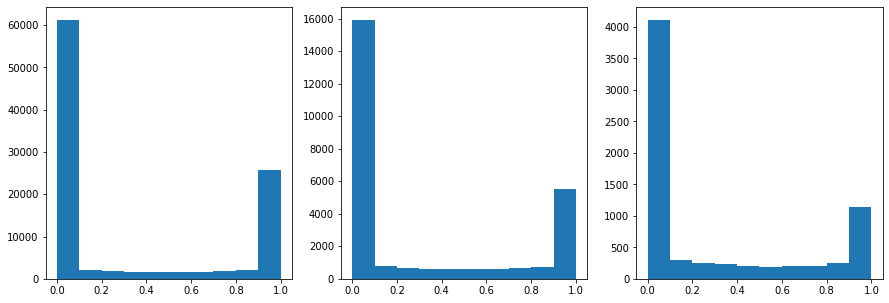

In [24]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].hist(props[256], bins = 10)
ax[1].hist(props[512], bins = 10)
ax[2].hist(props[1024], bins = 10)

plt.show()

In [29]:
import os, cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

label_dir = '/mnt/hdd1/c-MET_datasets/SLIDE_DATA/DL-based_tumor_seg_dataset/2205_1차anno/patch'
slide_list = sorted([i for i in os.listdir(label_dir) if os.path.isdir(os.path.join(label_dir, i))])

dict = {}
patch_mag = 200
patch_size = 256
for patch_size in [256, 512, 1024]:
    for i, slide in enumerate(slide_list):

        dict[slide] = []
        data_dir = os.path.join(label_dir, slide, f'{patch_mag}x_{patch_size}')
        labels = sorted([l for l in os.listdir(data_dir) if 'label' in l and 'png' in l])
        inputs = sorted([i for i in os.listdir(data_dir) if 'input' in i and 'jpg' in i])

        for j in range(len(labels)):
            if inputs[j].split('_input.jpg')[0] != labels[j].split('_label.png')[0]:
                print(f'check the pairness btw input {inputs[j]} and label {labels[j]}')
                break

            label_mask = cv2.imread(os.path.join(data_dir, labels[j]), cv2.IMREAD_GRAYSCALE)

            dict[slide].append((np.sum(label_mask), (patch_size**2)*255))

KeyboardInterrupt: 

In [3]:
props

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3405.24,
 8398.004,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 821.544,
 39101.719,
 52615.52,
 15998.277,
 25774.451,
 5521.608,
 6425.505,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6620.969,
 57566.612,
 46702.984,
 12978.012,
 39956.997,
 34990.03,
 9944.848,
 30389.186,
 3336.778,
 8782.979,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3094.68,
 10187.938,
 54098.863,
 35499.03,
 49221.194,
 58387.164,
 52911.197,
 62080.142,
 50527.925,
 9538.045,
 8686.735,
 11016.427,
 0.0,
 0.0,
 3585.821,
 48040.473,
 59151.16,
 58068.666,
 44860.463,
 59631.386,
 43546.787,
 47376.69,
 53545.214,
 39251.541,
 8029.897,
 18247.601,
 0.0,
 3464.772,
 11428.191,
 33268.559,
 37882.301,
 3708.854,
 147.838,
 11942.152,
 9333.651,
 16774.18,
 14313.517,
 13383.823,
 11020.396,
 13761.852,
 10884.464,
 7181.564,
 3065.907,
 221.261,
 4381.567,
 2214.597,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3687.02

In [7]:
data_dir

'/mnt/hdd1/c-MET_datasets/SLIDE_DATA/DL-based_tumor_seg_dataset/2205_1차anno/patch/S-LC0107-MET/200x_256'

{0, 255}
{0, 1, 2, 3, 4, 5, 250, 251, 252, 253, 254, 255}


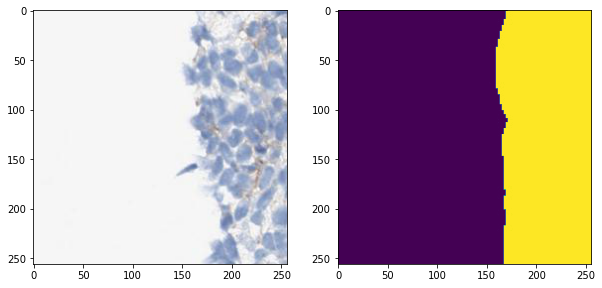

In [7]:
data_dir = '/mnt/hdd1/c-MET_datasets/SLIDE_DATA/DL-based_tumor_seg_dataset/2205_1차anno/patch/S-LC0080-MET/200x_256'

input = Image.open(os.path.join(data_dir, 'S-LC0080-MET_15872_30720_input.jpg'))
input = input.convert('RGB')
input = np.array(input)

label_mask = Image.open(os.path.join(data_dir, 'S-LC0080-MET_15872_30720_label.png'))
label_mask = label_mask.convert('L')
label_mask = np.array(label_mask)

print(set(np.ravel(label_mask)))

label_mask = cv2.imread(os.path.join(data_dir, 'S-LC0080-MET_15872_30720_label.jpg'), cv2.IMREAD_GRAYSCALE)

print(set(np.ravel(label_mask)))

fig, ax = plt.subplots(1 , 2, figsize=(10, 10))

ax[0].imshow(input)
ax[1].imshow(label_mask)

fig.show()

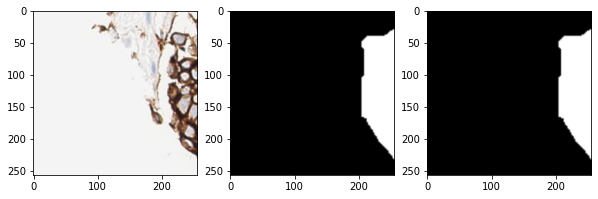

In [31]:
fig, ax = plt.subplots(1 , 3, figsize=(10, 10))

ax[0].imshow(input)
ax[1].imshow(label_mask, vmin=0, vmax=255, cmap = 'gray')

label_mask_ = ((label_mask > 0)*255).astype('uint8')
ax[2].imshow(label_mask, vmin=0, vmax=255, cmap = 'gray')

fig.show()

In [38]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 44)

a = [2*i for i in range(10)]
b = [2*i+1 for i in range(20)]

for (train_idx, test_idx), (b_tr_idx, b_ts_idx) in zip(kf.split(a), kf.split(b)):
    print(train_idx, test_idx)
    print(b_tr_idx, b_ts_idx)
    print("")

[0 1 3 4 5 6 8 9] [2 7]
[ 0  1  3  4  5  6  7  8 10 11 12 13 16 17 18 19] [ 2  9 14 15]

[1 2 3 4 5 6 7 8] [0 9]
[ 0  2  3  4  6  7  8  9 10 12 13 14 15 16 17 19] [ 1  5 11 18]

[0 1 2 3 4 5 7 9] [6 8]
[ 0  1  2  3  4  5  9 10 11 13 14 15 16 17 18 19] [ 6  7  8 12]

[0 2 3 4 6 7 8 9] [1 5]
[ 1  2  3  5  6  7  8  9 11 12 13 14 15 17 18 19] [ 0  4 10 16]

[0 1 2 5 6 7 8 9] [3 4]
[ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 18] [ 3 13 17 19]



In [10]:
np.load('/mnt/hdd1/c-MET_datasets/SLIDE_DATA/DL-based_tumor_seg_dataset/2205_1차anno/1-fold_non_tumorable_data.npy')

array([['S-LC0027-MET_10752_10240_input.jpg',
        'S-LC0027-MET_10752_10240_label.jpg'],
       ['S-LC0027-MET_11264_13312_input.jpg',
        'S-LC0027-MET_11264_13312_label.jpg'],
       ['S-LC0027-MET_11776_14848_input.jpg',
        'S-LC0027-MET_11776_14848_label.jpg'],
       ...,
       ['S-LC0107-MET_99840_61952_input.jpg',
        'S-LC0107-MET_99840_61952_label.jpg'],
       ['S-LC0107-MET_99840_67072_input.jpg',
        'S-LC0107-MET_99840_67072_label.jpg'],
       ['S-LC0107-MET_99840_71680_input.jpg',
        'S-LC0107-MET_99840_71680_label.jpg']], dtype='<U35')